In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM dogecoin''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2760 non-null   object 
 1   Symbol      2760 non-null   object 
 2   Date        2760 non-null   object 
 3   High        2760 non-null   float64
 4   Low         2760 non-null   float64
 5   Open        2760 non-null   float64
 6   Close       2760 non-null   float64
 7   Volume      2760 non-null   float64
 8   Marketcap   2760 non-null   float64
 9   Range       2760 non-null   float64
 10  Difference  2760 non-null   float64
dtypes: float64(8), object(3)
memory usage: 237.3+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2760 non-null   object        
 1   Symbol      2760 non-null   object        
 2   Date        2760 non-null   datetime64[ns]
 3   High        2760 non-null   float64       
 4   Low         2760 non-null   float64       
 5   Open        2760 non-null   float64       
 6   Close       2760 non-null   float64       
 7   Volume      2760 non-null   float64       
 8   Marketcap   2760 non-null   float64       
 9   Range       2760 non-null   float64       
 10  Difference  2760 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 237.3+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03,2760.000000,2.760000e+03
mean,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09,0.002562,9.325862e-05
std,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09,0.017519,9.177570e-03
min,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06,0.000002,-1.433119e-01
25%,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07,0.000012,-2.215439e-05
50%,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08,0.000072,-9.495016e-07
75%,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08,0.000199,1.776950e-05
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10,0.466467,1.842827e-01


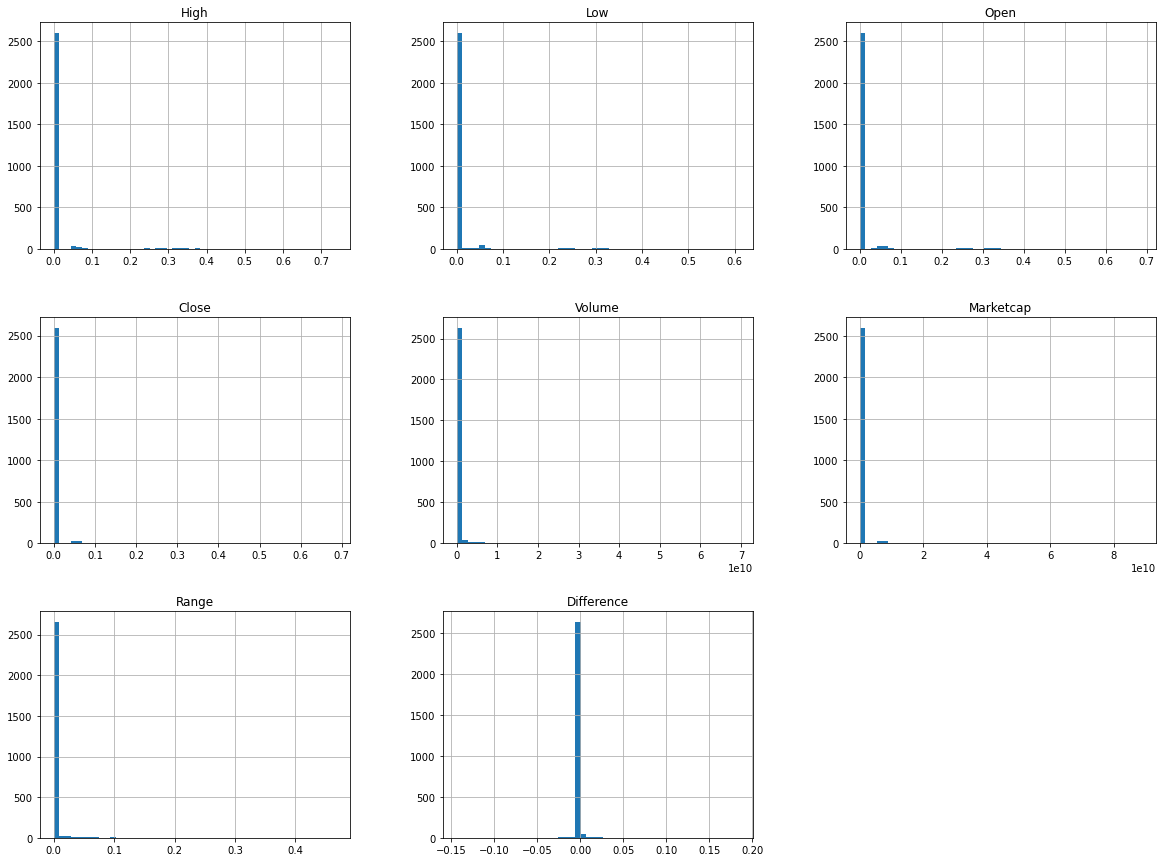

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,2711,2702,2704,2744,2682,2679,2698,2701,2707,2700
Date,2021-05-19 23:59:59,2021-05-10 23:59:59,2021-05-12 23:59:59,2021-06-21 23:59:59,2021-04-20 23:59:59,2021-04-17 23:59:59,2021-05-06 23:59:59,2021-05-09 23:59:59,2021-05-15 23:59:59,2021-05-08 23:59:59
Difference,-0.143312,-0.119723,-0.108366,-0.101969,-0.088935,-0.081925,-0.072039,-0.06575,-0.051696,-0.051362


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,2678,2697,2699,2696,2705,2681,2706,2712,2695,2677
Date,2021-04-16 23:59:59,2021-05-05 23:59:59,2021-05-07 23:59:59,2021-05-04 23:59:59,2021-05-13 23:59:59,2021-04-19 23:59:59,2021-05-14 23:59:59,2021-05-20 23:59:59,2021-05-03 23:59:59,2021-04-15 23:59:59
Difference,0.184283,0.120278,0.103667,0.10106,0.098198,0.086852,0.072534,0.069941,0.068075,0.06104


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

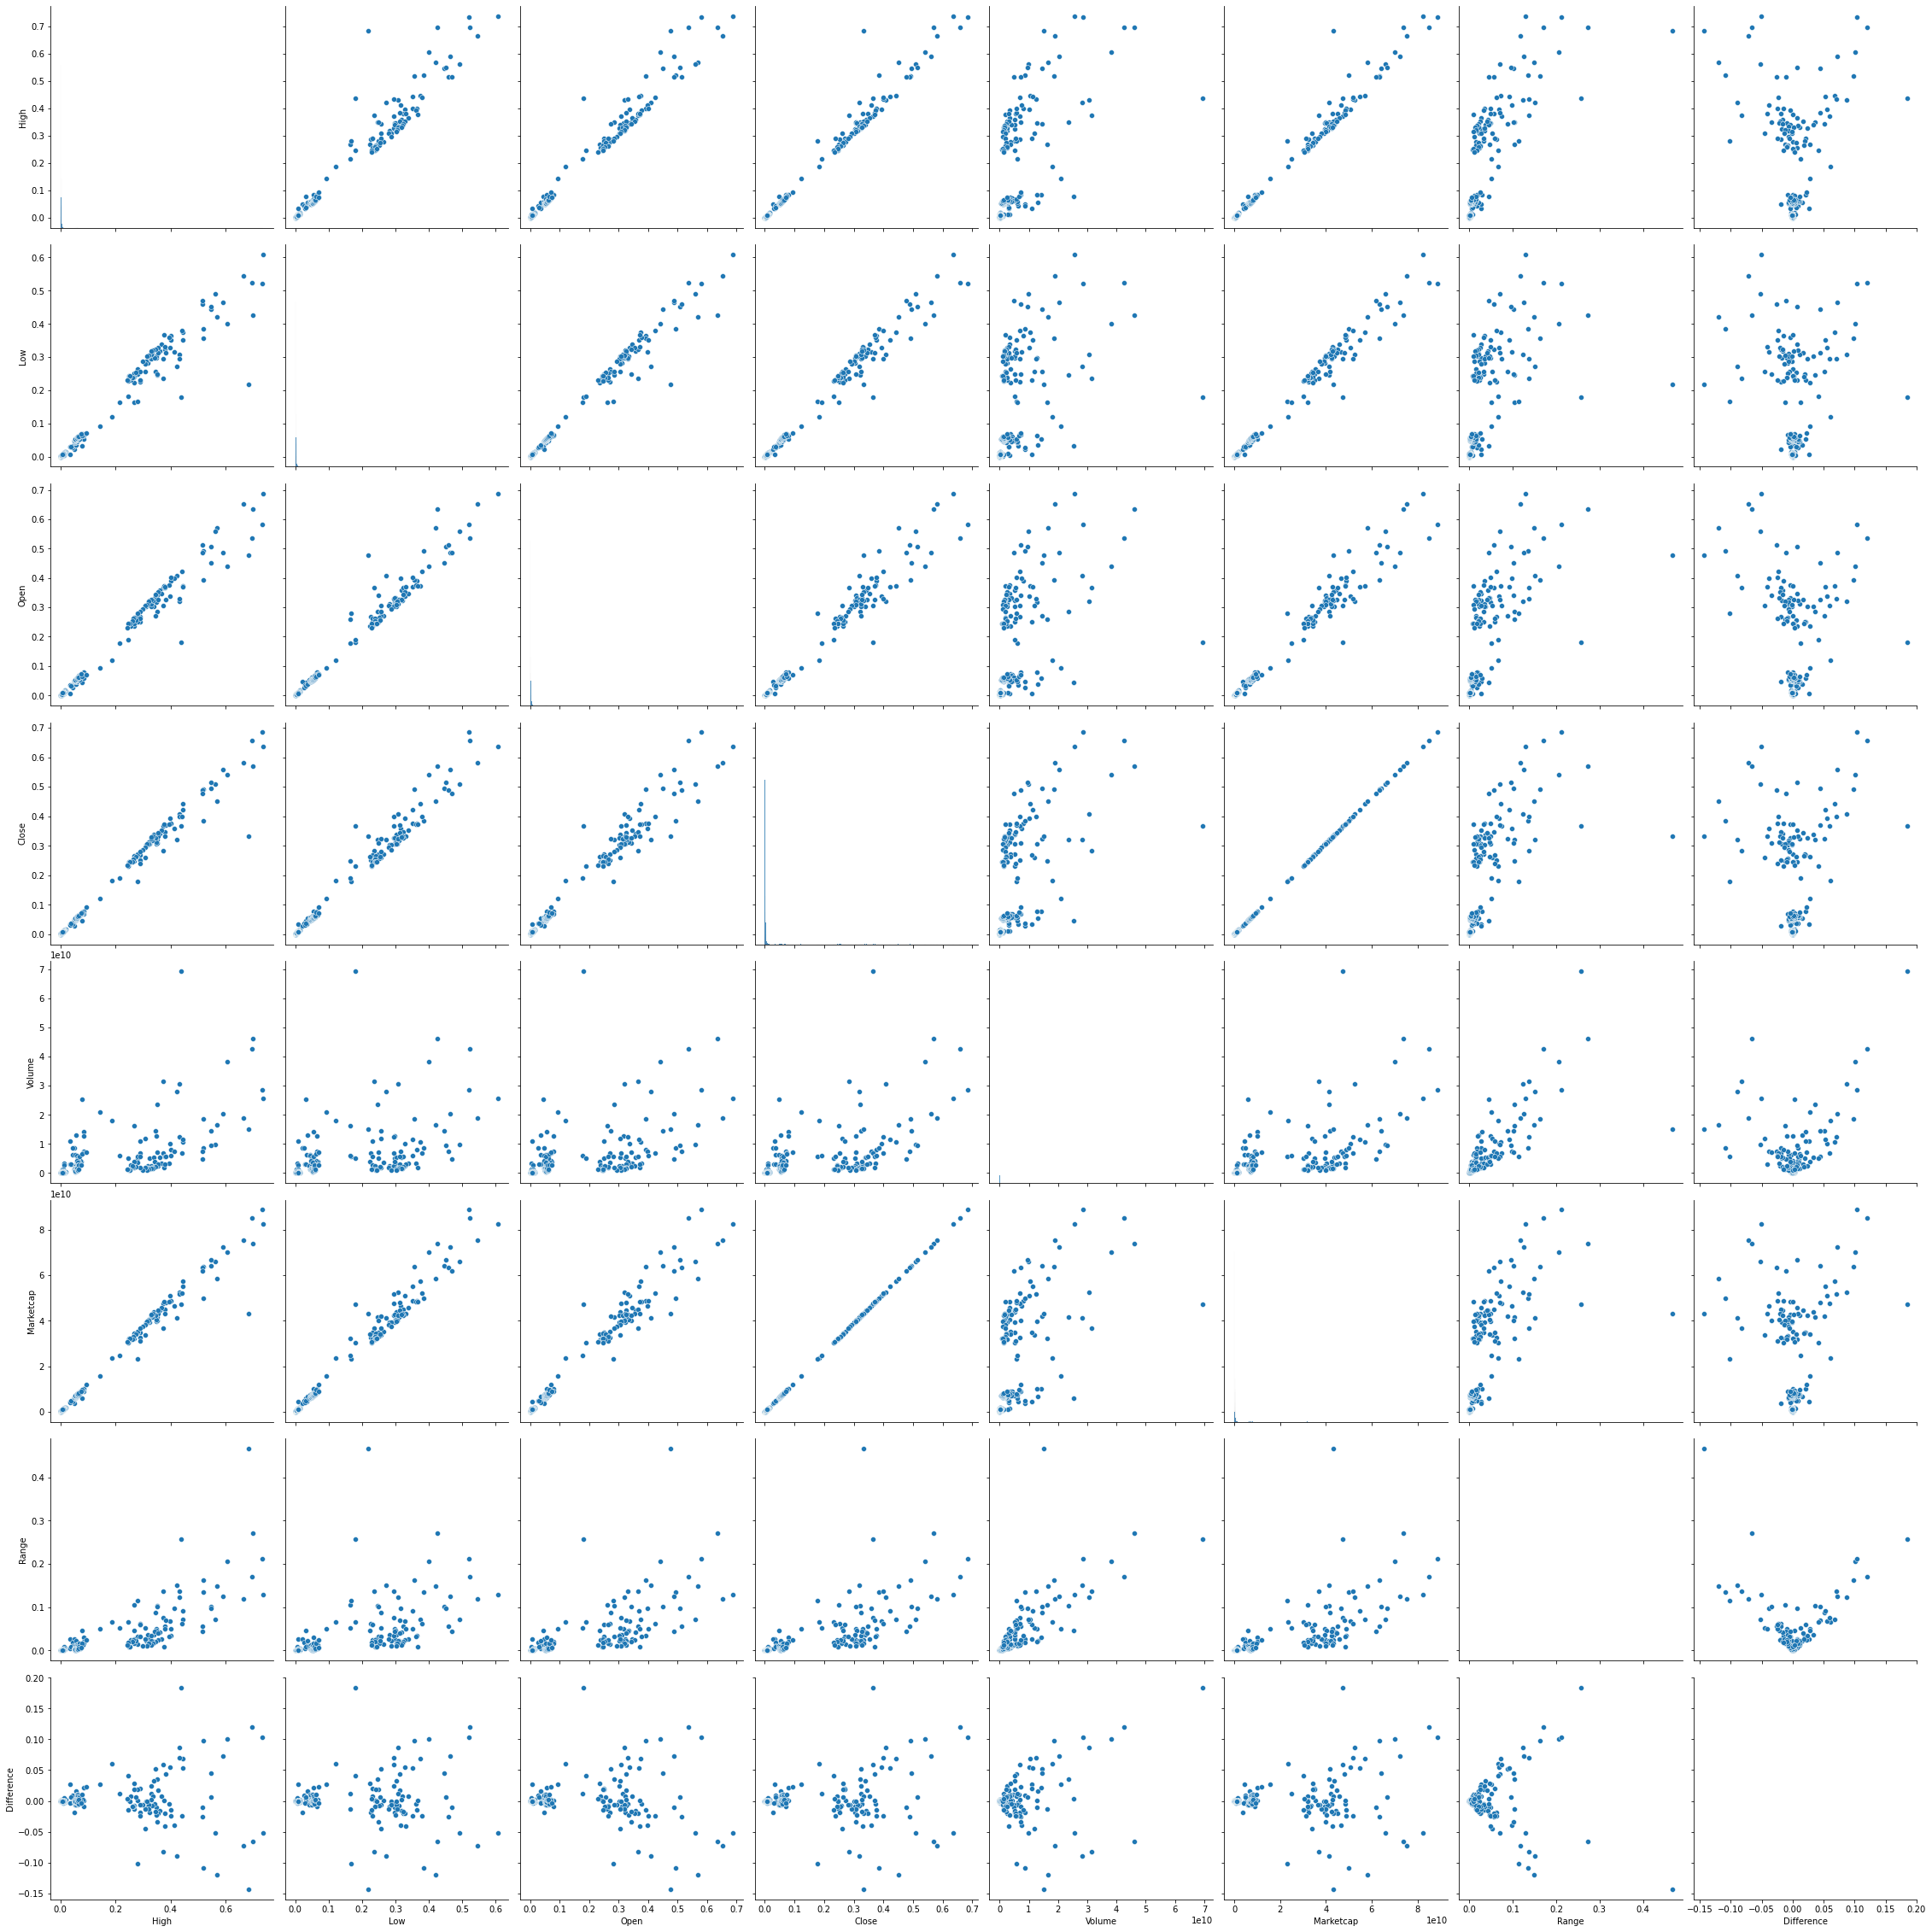

In [15]:
sns.pairplot(data,height=4);
